In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,fbeta_score
import xgboost as xgb

# Load dataset
dados_rh = pd.read_csv(r"D:\Estudos\Data_Science\!Formacao Data Scientist\2.(DSA)_Business_Analytics\8.0_RH_Analytics\dados\dataset.csv", sep = ',' )
dados_rh

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,AgeStartedWorking
0,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
1,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
2,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
3,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
4,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23053,34,Current employee,Travel_Rarely,Research & Development,27,2,Medical,4,Female,3,...,0,9,3,3,3,2,1,2,Company Website,25
23054,37,Current employee,Travel_Frequently,Research & Development,9,3,Medical,3,Female,3,...,3,3,5,3,3,2,1,2,Jora,34
23055,55,Current employee,Non-Travel,Research & Development,8,1,Medical,4,Female,3,...,0,31,3,3,2,0,2,2,Recruit.net,24
23056,27,Current employee,Travel_Rarely,Research & Development,16,4,Technical Degree,4,Male,3,...,1,7,2,3,6,2,1,2,Company Website,20


In [24]:
# Convert categorical columns to categorical types
categorical_columns = [
    "Attrition", "BusinessTravel", "Department", "Education", "EducationField", "Employee Source", 
    "EnvironmentSatisfaction", "Gender", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction", 
    "MaritalStatus", "OverTime", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"
]
dados_rh[categorical_columns] = dados_rh[categorical_columns].astype("category")

In [25]:
# Convert numerical columns to integer
dados_rh[["DistanceFromHome", "MonthlyIncome", "PercentSalaryHike"]] = dados_rh[["DistanceFromHome", "MonthlyIncome", "PercentSalaryHike"]].astype(int)

In [26]:
# Feature Engineering
dados_rh["PriorYearsOfExperience"] = dados_rh["TotalWorkingYears"] - dados_rh["YearsAtCompany"]
dados_rh["AverageTenure"] = dados_rh["PriorYearsOfExperience"] / dados_rh["NumCompaniesWorked"]
dados_rh["AverageTenure"] = dados_rh["AverageTenure"].replace([np.inf, - np.inf], 0).fillna(0)


In [27]:
# Filtering data based on Attrition
dados_rh_1 = dados_rh[dados_rh["Attrition"] != "Termination"].copy()
dados_rh_2 = dados_rh[dados_rh["Attrition"] != "Voluntary Resignation"].copy()

In [28]:
dados_rh_1["Attrition"] = dados_rh_1["Attrition"].cat.codes  # Convert to numerical labels
X = dados_rh_1[["Age", "Department", "DistanceFromHome", "Employee Source", "JobRole", "MaritalStatus", "AverageTenure", "PriorYearsOfExperience", "Gender", "Education", "EducationField"]]
y = dados_rh_1["Attrition"]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2004)

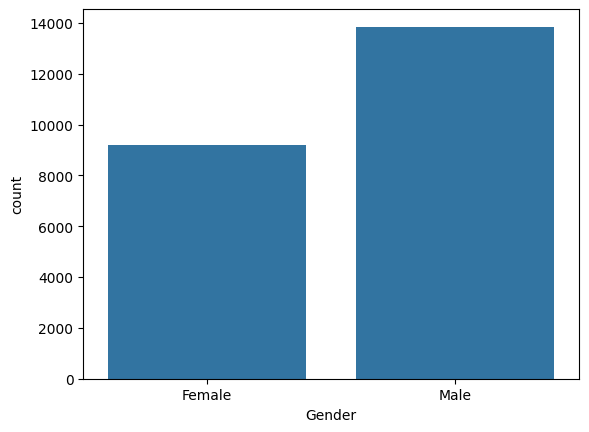

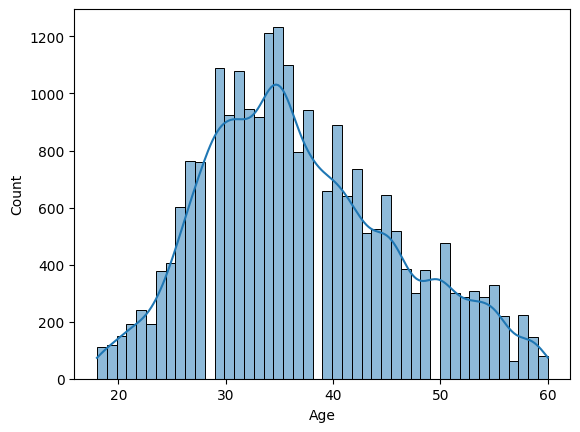

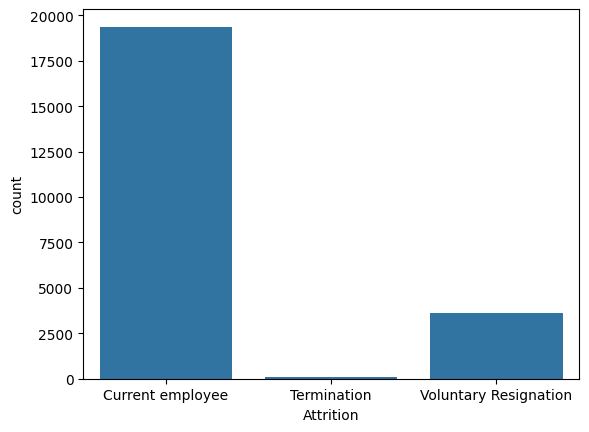

In [29]:
# Data Visualization
sns.countplot(x="Gender", data=dados_rh)
plt.show()
sns.histplot(dados_rh["Age"], kde=True)
plt.show()
sns.countplot(x="Attrition", data=dados_rh)
plt.show()

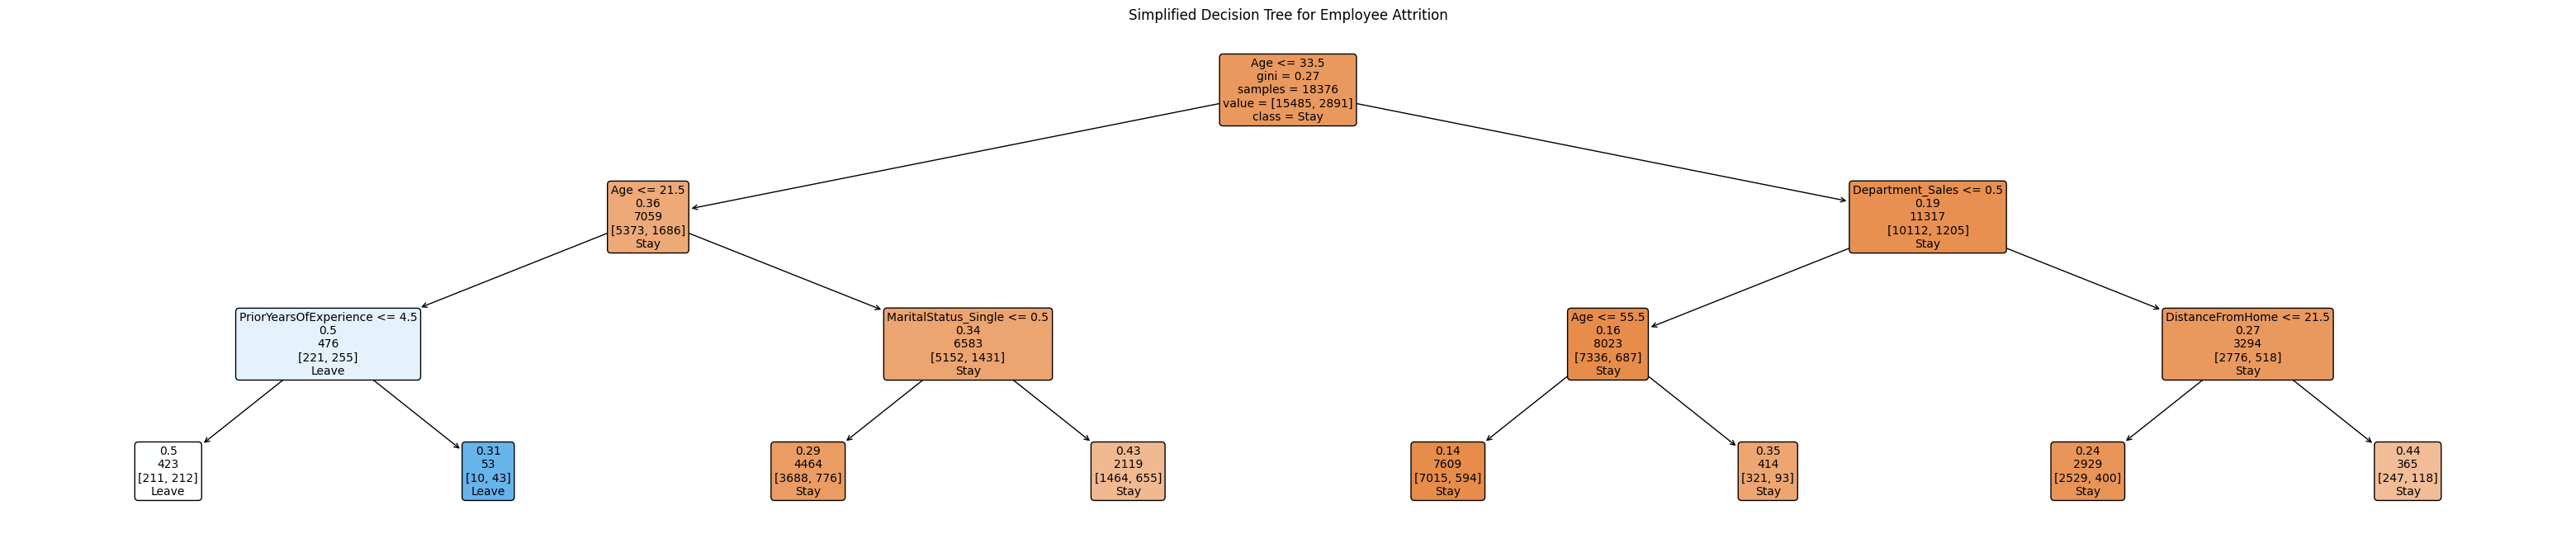

Accuracy: 0.8487486398258978
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3885
           2       0.58      0.08      0.14       710

    accuracy                           0.85      4595
   macro avg       0.72      0.53      0.53      4595
weighted avg       0.81      0.85      0.80      4595



In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = feature_importances.nlargest(6).index  # Select top 5 most important features

# Visualize simplified Decision Tree with better readability
plt.figure(figsize=(40, 8))
plot_tree(dt, class_names=['Stay', 'Leave'], filled=True, rounded=True, fontsize=10, proportion=False, label="root", feature_names=X.columns, precision=2)
plt.title("Simplified Decision Tree for Employee Attrition")
plt.show()

# Model evaluation
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

- A darker color (closer to the color representing 'Stay') indicates a higher probability of the individual being classified as 'Stay'.
- Conversely, if the color is lighter or closer to the color representing 'Leave', it indicates a higher probability of leaving.
- O values mostra qual a o número de amostras de cada classe chegaram até aquele nó antes da divisão.

Acurácia: 0.8579
F2-Score: 0.1230

Relatório de Classificação:
               precision    recall  f1-score   support

        Stay       0.86      1.00      0.92      3885
       Leave       0.83      0.10      0.18       710

    accuracy                           0.86      4595
   macro avg       0.84      0.55      0.55      4595
weighted avg       0.85      0.86      0.81      4595



c:\Users\flari\anaconda3\envs\FlavioEnv1.0\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:36:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


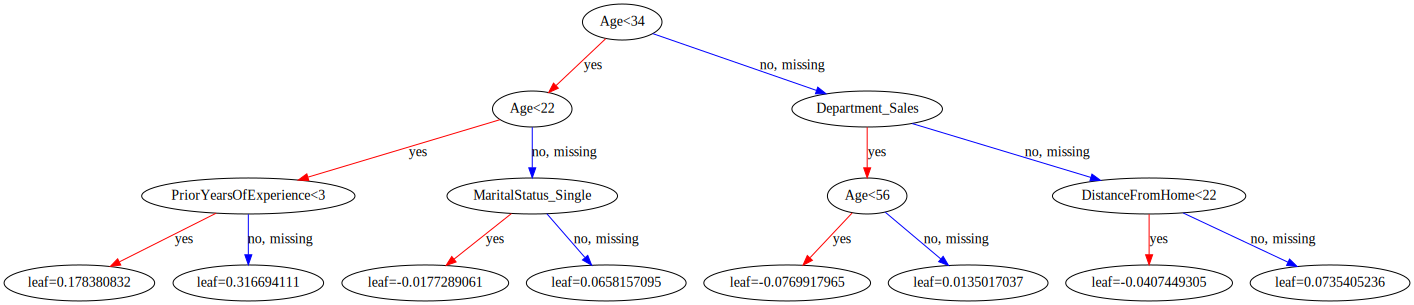

In [31]:
y = y.replace(2, 1)
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Criar e treinar o modelo XGBoost
xgb_clf = xgb.XGBClassifier(
    max_depth=3,         
    learning_rate=0.1,    
    n_estimators=100,     
    objective='binary:logistic',  
    eval_metric='logloss',  
    random_state=42,
    use_label_encoder=False
)

xgb_clf.fit(X_train, y_train)

# Fazer previsões
y_pred = xgb_clf.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
report = classification_report(y_test, y_pred, target_names=['Stay', 'Leave'])

print(f"Acurácia: {accuracy:.4f}")
print(f"F2-Score: {f2:.4f}")
print("\nRelatório de Classificação:\n", report)

# 📌 Plot and save the decision tree
xgb.to_graphviz(xgb_clf, num_trees=0)

Se o modelo está prevendo churn (funcionários que saem da empresa):

- Se uma folha tiver Leaf = 1.25, indica que a região está fortemente associada a funcionários que saem.
- Se uma folha tiver Leaf = -0.80, indica que a região está associada a funcionários que permanecem.